In [2]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# 读入数据
le = pd.read_csv('./Life Expectancy Data.csv', delimiter=',')
le.dataframeName = 'Life Expectancy Data.csv'

In [4]:
# 显示数据帧的前5行
le.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [5]:
# 对列进行归一化重命名
le.rename(columns={"Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [6]:
# 显示数据帧的描述性信息
le.describe()

Year  Life_Expectancy  Adult_Mortality  Infant_Deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percentage_Exp   HepatitisB        Measles          BMI  \
count  2744.000000     2938.000000  2385.000000    2938.000000  2904.000000   
mean      4.602861      738.251295    80.940461    2419.592240    38.321247   
std       4.052413     1987.914858    25.070016   11467.272489    20.044034   
min       0.010000        0.000000     1.000000       0.000000     1.000000   
25%       0.877500        4.685343    77.000000       0.000000    19.300000   
50%       3.755000       64.912906    92.000000      17.000000    43.500000   
75%       7.702500      441.534144    97.000000     360.250000    56.200000   
max      17.870000    19479.911610    99.000000  212183.000000    87.300000   

       Under_Five_Deaths        Polio     Tot_Exp   Diphtheria     HIV/AIDS  \
count        2938.000000  2919.000000  2712.00000  2919.000000  2938.000000   
mean           42.035739    82.550188     5.93819    82.324084     1.742103   
std           160.445548    23.428046     2.49832    23.716912     5.077785   
min             0.000000     3.000000     0.37000     2.000000     0.100000   
25%             0.000000    78.000000     4.26000    78.000000     0.100000   
50%             4.000000    93.000000     5.75500    93.000000     0.100000   
75%            28.000000    97.000000     7.49250    97.000000     0.800000   
max          2500.000000    99.000000    17.60000    99.000000    50.600000   

                 GDP    Population  thinness_1to19_years  thinness_5to9_years  \
count    2490.000000  2.286000e+03           2904.000000          2904.000000   
mean     7483.158469  1.275338e+07              4.839704             4.870317   
std     14270.169342  6.101210e+07              4.420195             4.508882   
min         1.681350  3.400000e+01              0.100000             0.100000   
25%       463.935626  1.957932e+05              1.600000             1.500000   
50%      1766.947595  1.386542e+06              3.300000             3.300000   
75%      5910.806335  7.420359e+06              7.200000             7.200000   
max    119172.741800  1.293859e+09             27.700000            28.600000   

       Income_Comp_Of_Resources    Schooling  
count               2771.000000  2775.000000  
mean                   0.627551    11.992793  
std                    0.210904     3.358920  
min                    0.000000     0.000000  
25%                    0.493000    10.100000  
50%                    0.677000    12.300000  
75%                    0.779000    14.300000  
max                    0.948000    20.700000

In [7]:
# 显示数据帧的数据类型
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [8]:
# 显示每列数据空缺值百分率
le.isnull().sum()*100/le.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

In [9]:
# 建立国家列表与属性列表
country_list = le.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

In [10]:
# 使用插值函数填补能够填补的空缺值
for country in country_list:
    le.loc[le['Country'] == country,fill_list] = le.loc[le['Country'] == country,fill_list].interpolate()
# 删除仍包含空缺值的行
le.dropna(inplace=True)

In [11]:
# 检测处理后是否仍存在空缺值
le.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

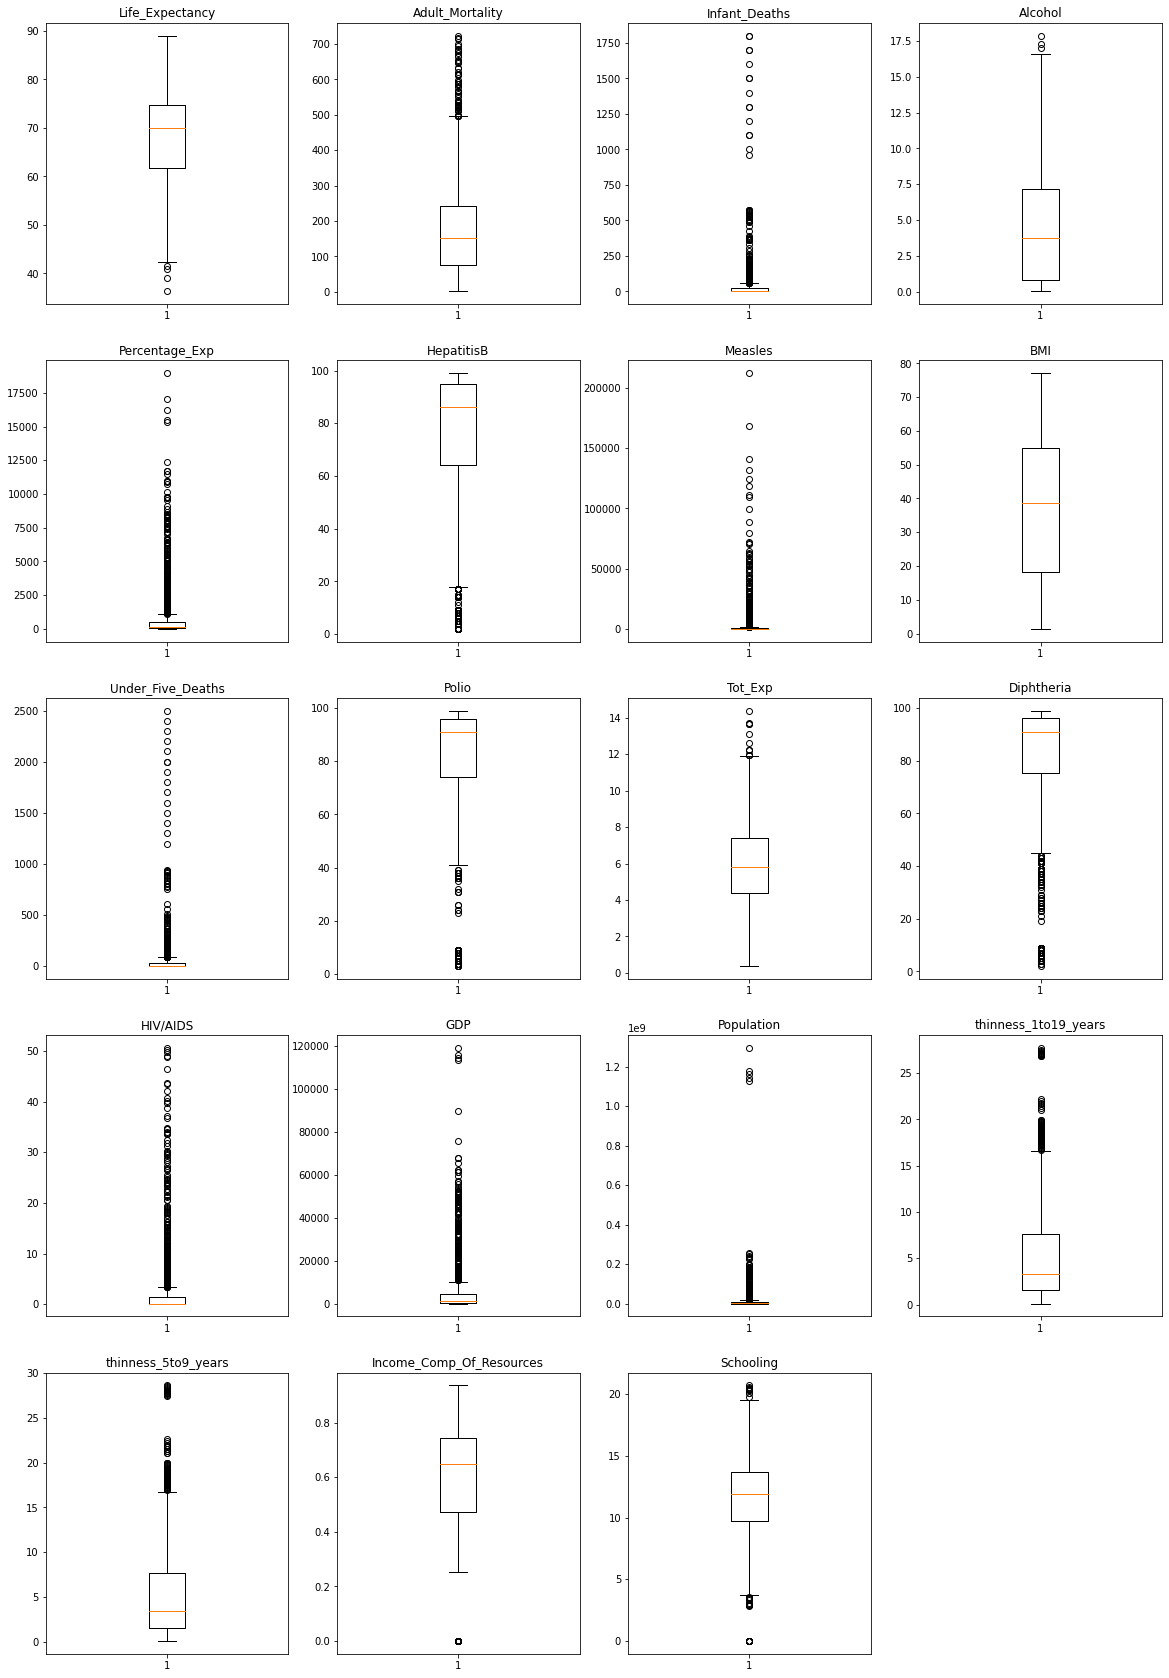

In [12]:
# 建立列与整数的词典
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}

# 通过箱形图探测离群值
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(le[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [13]:
# 使用Tukey法计算每列中离群值数量与百分率

for variable in col_dict.keys():
    q75, q25 = np.percentile(le[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((le[variable] > max_val) |
                                                                                           (le[variable] < min_val))[0])),len((np.where((le[variable] > max_val) |
                                                                                           (le[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life_Expectancy : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult_Mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in Infant_Deaths : 198 and 9.96477101157524
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in Percentage_Exp : 232 and 11.675893306492199
Number of outliers and percentage of it in HepatitisB : 216 and 10.870659285354806
Number of outliers and percentage of it in Measles : 361 and 18.16809260191243
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in Under_Five_Deaths : 227 and 11.424257674886764
Number of outliers and percentage of it in Polio : 159 and 8.002013085052843
Number of outliers and percentage of it in Tot_Exp : 13 and 0.6542526421741318
Number of outliers and percentage of it in Diphtheria : 195 and 9.813789632611979
Number of outliers and perce

In [14]:
# 使用缩尾处理去除各列的离群值
winsorized_Life_Expectancy = winsorize(le['Life_Expectancy'],(0.01,0))
winsorized_Adult_Mortality = winsorize(le['Adult_Mortality'],(0,0.03))
winsorized_Infant_Deaths = winsorize(le['Infant_Deaths'],(0,0.10))
winsorized_Alcohol = winsorize(le['Alcohol'],(0,0.01))
winsorized_Percentage_Exp = winsorize(le['Percentage_Exp'],(0,0.12))
winsorized_HepatitisB = winsorize(le['HepatitisB'],(0.11,0))
winsorized_Measles = winsorize(le['Measles'],(0,0.19))

# "麻疹"一列需要调整的数据过多，占到了19%，可能无法提供更好的结果，故删除该列
le = le.drop('Measles',axis=1)

winsorized_Under_Five_Deaths = winsorize(le['Under_Five_Deaths'],(0,0.12))
winsorized_Polio = winsorize(le['Polio'],(0.09,0))
winsorized_Tot_Exp = winsorize(le['Tot_Exp'],(0,0.01))
winsorized_Diphtheria = winsorize(le['Diphtheria'],(0.10,0))
winsorized_HIV = winsorize(le['HIV/AIDS'],(0,0.16))
winsorized_GDP = winsorize(le['GDP'],(0,0.13))
winsorized_Population = winsorize(le['Population'],(0,0.14))
winsorized_thinness_1to19_years = winsorize(le['thinness_1to19_years'],(0,0.04))
winsorized_thinness_5to9_years = winsorize(le['thinness_5to9_years'],(0,0.04))
winsorized_Income_Comp_Of_Resources = winsorize(le['Income_Comp_Of_Resources'],(0.05,0))
winsorized_Schooling = winsorize(le['Schooling'],(0.02,0.01))

In [15]:
# 检测缩尾处理后的变量是否有离群值
win_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [16]:
# 将缩尾处理后的变量加入数据帧中
le['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
le['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
le['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
le['winsorized_Alcohol'] = winsorized_Alcohol
le['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
le['winsorized_HepatitisB'] = winsorized_HepatitisB
le['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
le['winsorized_Polio'] = winsorized_Polio
le['winsorized_Tot_Exp'] = winsorized_Tot_Exp
le['winsorized_Diphtheria'] = winsorized_Diphtheria
le['winsorized_HIV'] = winsorized_HIV
le['winsorized_GDP'] = winsorized_GDP
le['winsorized_Population'] = winsorized_Population
le['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
le['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
le['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
le['winsorized_Schooling'] = winsorized_Schooling

In [17]:
# 显示数据帧的描述性信息
le.describe()

Year  Life_Expectancy  Adult_Mortality  Infant_Deaths  \
count  1987.000000      1987.000000      1987.000000    1987.000000   
mean   2006.984902        67.981782       175.187217      36.623553   
std       4.323147         9.706401       131.616942     138.784913   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2003.000000        61.700000        75.000000       1.000000   
50%    2007.000000        69.900000       153.000000       4.000000   
75%    2011.000000        74.700000       243.000000      25.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percentage_Exp  HepatitisB          BMI  \
count  1987.000000     1987.000000  1987.00000  1987.000000   
mean      4.455644      685.492318    73.86160    36.428636   
std       3.976733     1761.669050    29.02807    19.736138   
min       0.010000        0.000000     2.00000     1.400000   
25%       0.830000       29.469887    64.00000    18.150000   
50%       3.770000      104.314473    86.00000    38.700000   
75%       7.190000      470.870122    95.00000    55.000000   
max      17.870000    18961.348600    99.00000    77.100000   

       Under_Five_Deaths        Polio  ...  winsorized_Polio  \
count        1987.000000  1987.000000  ...       1987.000000   
mean           50.932562    80.371917  ...         82.957725   
std           188.933117    24.363376  ...         17.556131   
min             0.000000     3.000000  ...         44.000000   
25%             1.000000    74.000000  ...         74.000000   
50%             4.000000    91.000000  ...         91.000000   
75%            36.000000    96.000000  ...         96.000000   
max          2500.000000    99.000000  ...         99.000000   

       winsorized_Tot_Exp  winsorized_Diphtheria  winsorized_HIV  \
count         1987.000000            1987.000000     1987.000000   
mean             5.895471              83.225969        0.874082   
std              2.266421              17.239348        1.183198   
min              0.370000              45.000000        0.100000   
25%              4.360000              75.500000        0.100000   
50%              5.800000              91.000000        0.100000   
75%              7.385000              96.000000        1.400000   
max             11.700000              99.000000        3.200000   

       winsorized_GDP  winsorized_Population  winsorized_thinness_1to19_years  \
count     1987.000000           1.987000e+03                      1987.000000   
mean      2864.719760           4.799769e+06                         4.955561   
std       3186.069874           6.217060e+06                         4.187776   
min          1.681350           3.400000e+01                         0.100000   
25%        384.553107           1.967480e+05                         1.600000   
50%       1334.651896           1.396861e+06                         3.300000   
75%       4441.530655           7.625918e+06                         7.600000   
max       9291.227619           1.699335e+07                        15.700000   

       winsorized_thinness_5to9_years  winsorized_Income_Comp_Of_Resources  \
count                     1987.000000                          1987.000000   
mean                         5.024006                             0.616143   
std                          4.265385                             0.174584   
min                          0.100000                             0.276000   
25%                          1.600000                             0.473000   
50%                          3.400000                             0.648000   
75%                          7.700000                             0.745000   
max                         16.300000                             0.936000   

       winsorized_Schooling  
count           1987.000000  
mean              11.658581  
std                3.102260  
min                4.500000  
25%                9.700000  
50%

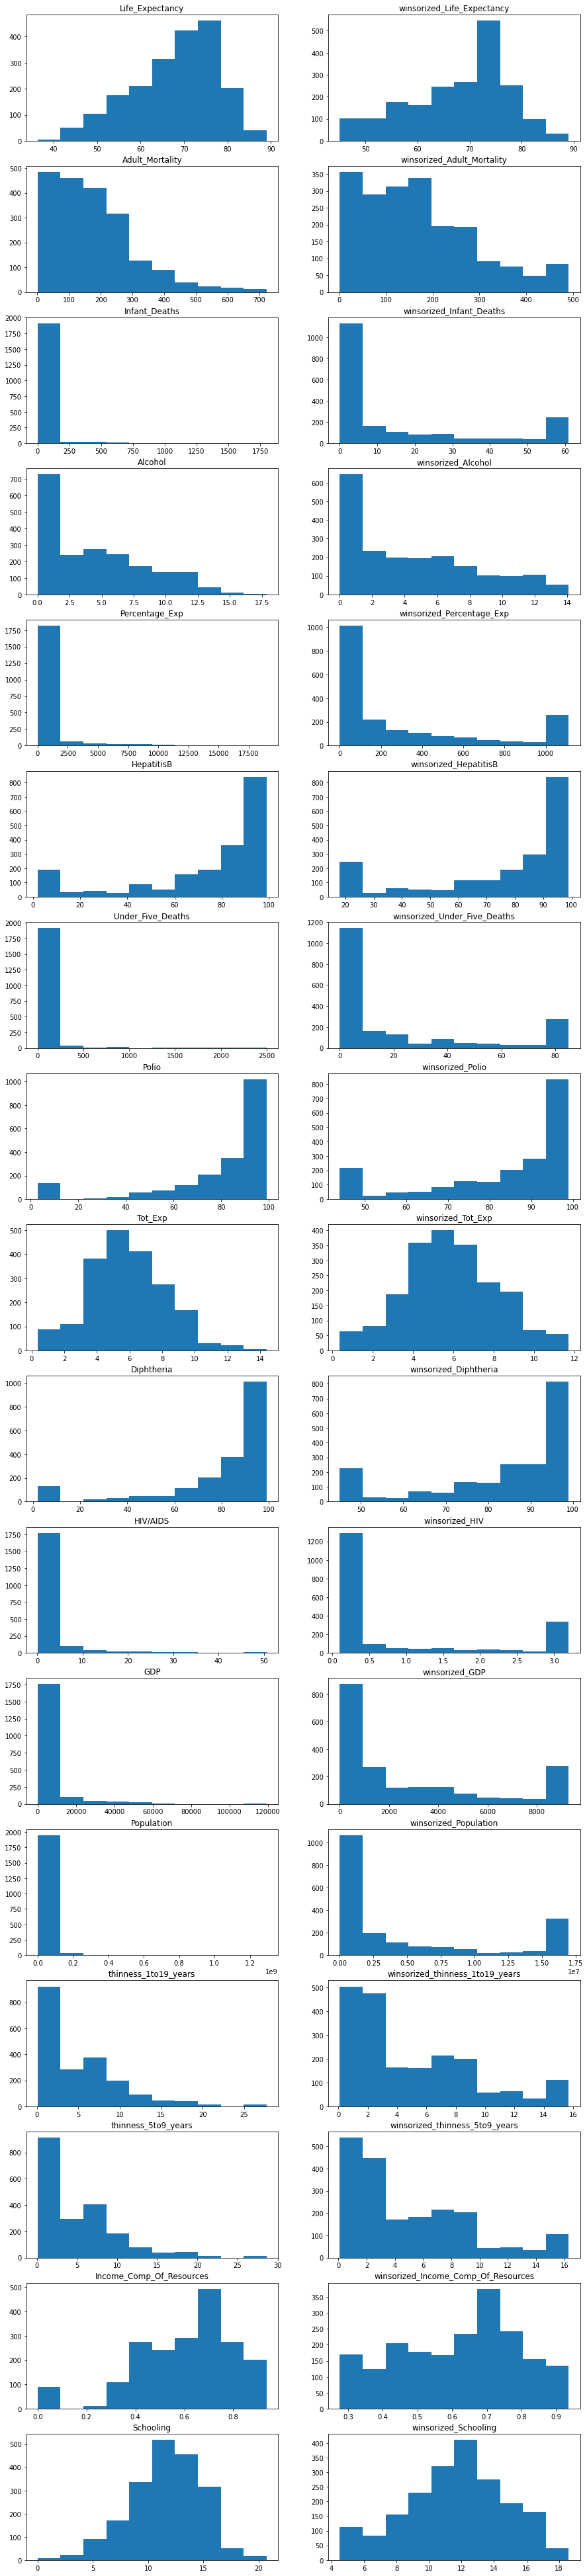

In [18]:
# 绘制数据帧中所有列的数据直方图
all_col = ['Life_Expectancy','winsorized_Life_Expectancy','Adult_Mortality','winsorized_Adult_Mortality','Infant_Deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','Percentage_Exp','winsorized_Percentage_Exp','HepatitisB',
         'winsorized_HepatitisB','Under_Five_Deaths','winsorized_Under_Five_Deaths','Polio','winsorized_Polio','Tot_Exp',
         'winsorized_Tot_Exp','Diphtheria','winsorized_Diphtheria','HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP',
         'Population','winsorized_Population','thinness_1to19_years','winsorized_thinness_1to19_years','thinness_5to9_years',
         'winsorized_thinness_5to9_years','Income_Comp_Of_Resources','winsorized_Income_Comp_Of_Resources',
         'Schooling','winsorized_Schooling']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(le[all_col[i]])
    plt.title(all_col[i])

plt.show()

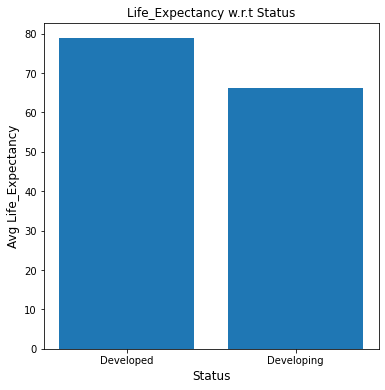

In [19]:
# 绘制预期寿命关于发展状态的直方图
plt.figure(figsize=(6,6))
plt.bar(le.groupby('Status')['Status'].count().index,le.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

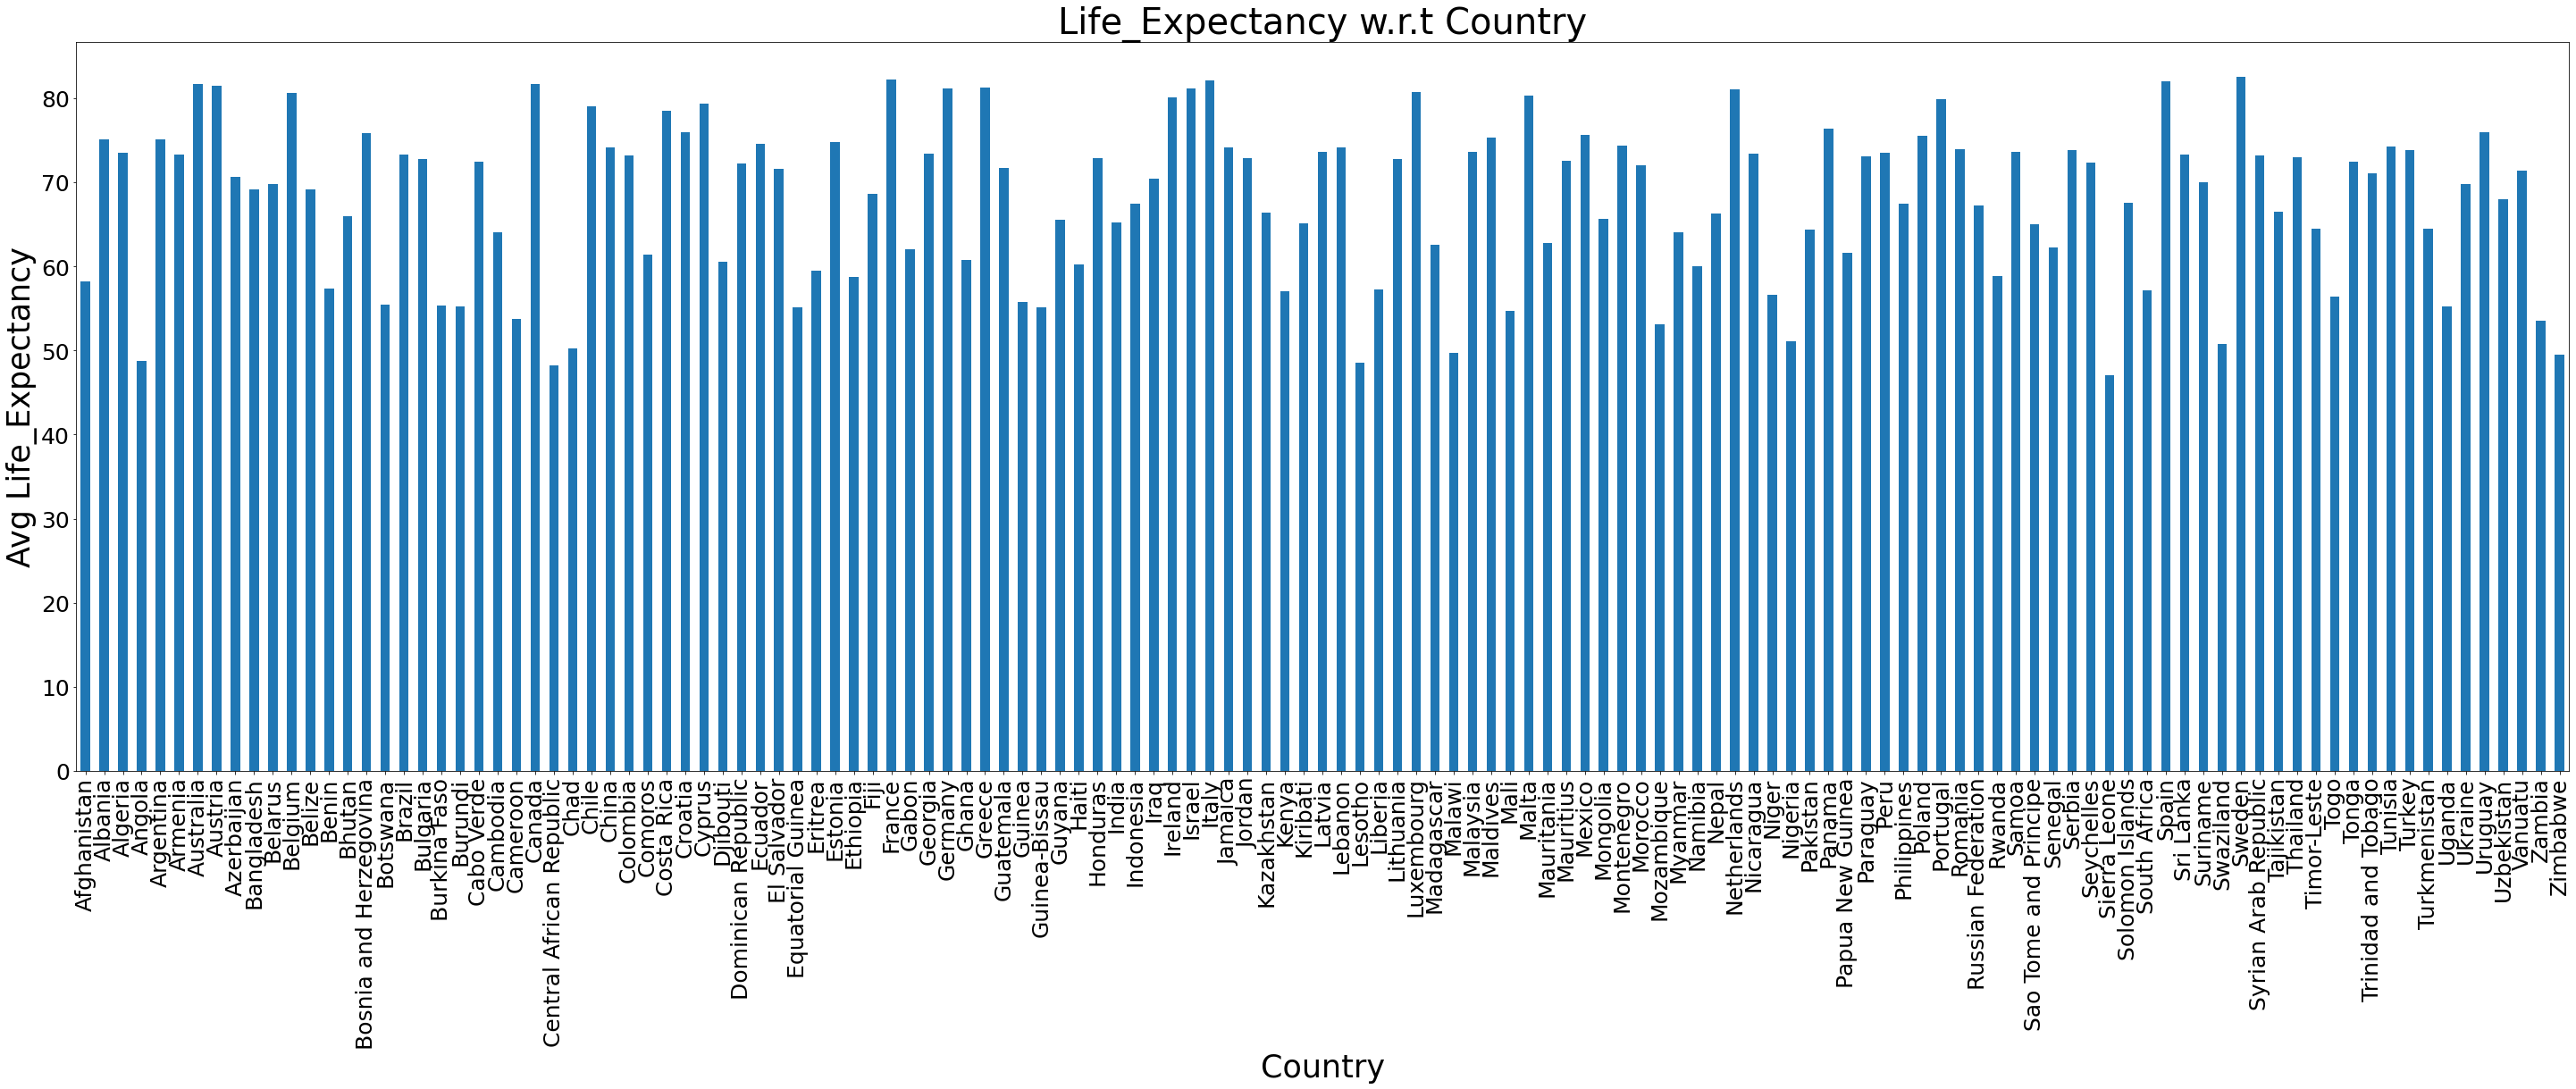

In [20]:
# 绘制预期寿命关于国名的直方图
le_country = le.groupby('Country')['winsorized_Life_Expectancy'].mean()
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

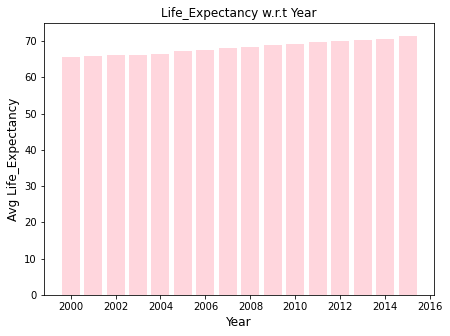

In [21]:
# 绘制预期寿命关于年份的直方图
plt.figure(figsize=(7,5))
plt.bar(le.groupby('Year')['Year'].count().index,le.groupby('Year')['winsorized_Life_Expectancy'].mean(),color='pink',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

In [22]:
# 计算缩尾处理后各个数据变量间的相关性
le_win = le.iloc[:,21:]
le_win['Country'] = le['Country']
le_win['Year'] = le['Year']
le_win['Status'] = le['Status']
le_win_num = le_win.iloc[:,:-3]
cormat = le_win_num.corr()

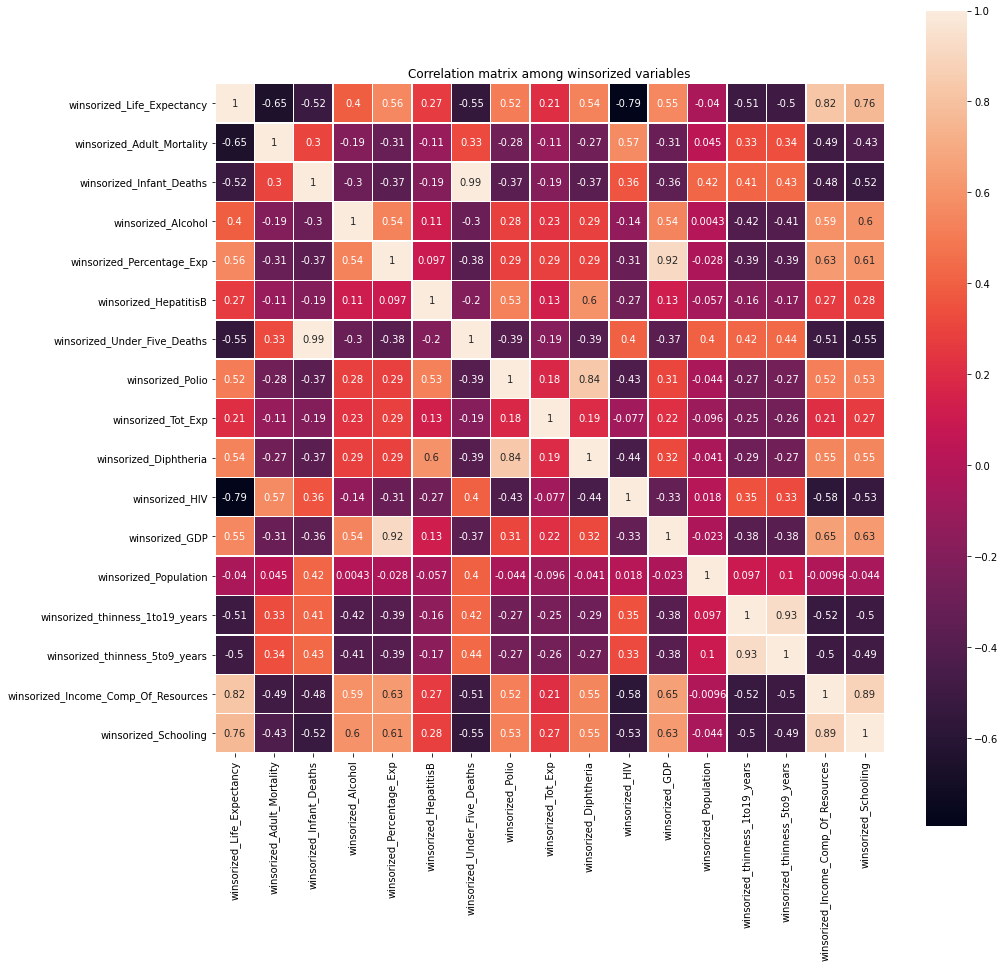

In [23]:
# 绘制相关性热力图
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

In [24]:
# 使用t检验判断发达国家与发展中国家预期寿命差别的显著性
stats.ttest_ind(le.loc[le['Status']=='Developed','Life_Expectancy'],le.loc[le['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=22.92439377113489, pvalue=2.2504696584331004e-103)

In [25]:
# 建立只包含特征的数据帧
feature_df = le[['Status','winsorized_Life_Expectancy','winsorized_Income_Comp_Of_Resources','winsorized_HIV','winsorized_Adult_Mortality']]

In [26]:
# 使用one-hot编码处理"发展状态"变量，得到最终的数据帧
feature_df = pd.concat([feature_df,pd.get_dummies(feature_df['Status'],drop_first=True)],axis=1)
final = feature_df.drop('Status',axis=1)
final.head()

winsorized_Life_Expectancy  winsorized_Income_Comp_Of_Resources  \
0                        65.0                                0.479   
1                        59.9                                0.476   
2                        59.9                                0.470   
3                        59.5                                0.463   
4                        59.2                                0.454   

   winsorized_HIV  winsorized_Adult_Mortality  Developing  
0             0.1                       263.0           1  
1             0.1                       271.0           1  
2             0.1                       268.0           1  
3             0.1                       272.0           1  
4             0.1                       275.0           1

In [27]:
# 对预期寿命与相关性最高的资源的收入构成进行一元线性回归
linear_reg = LinearRegression()
x = final.winsorized_Income_Comp_Of_Resources.values.reshape(-1,1)
y = final.winsorized_Life_Expectancy.values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 1)
model = linear_reg.fit(x_train,y_train)

In [28]:
# 打印参数
print("w0: ", linear_reg.intercept_)
print("w1: ", linear_reg.coef_)

w0:  [39.96681679]
w1:  [[45.52164558]]


In [29]:
# 计算朴素R2指标
model.score(x_train, y_train)

0.6792874702330738

In [30]:
# 计算交叉验证R2指标
cross_val_score(model, x_train,  y_train, cv= 10, scoring="r2").mean()

0.6756932910947018

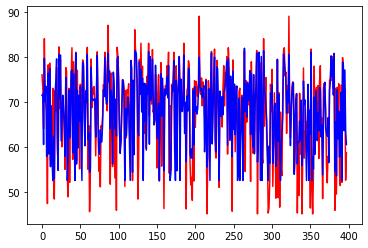

In [31]:
# 在一张图表中绘制预测值与真实值
y_head = model.predict(x_test)
no =np.array(range(0,len(y_test)))
plt.plot(no,y_test,color="r")
plt.plot(no,y_head,color="blue")
plt.show()

In [32]:
# 对预期寿命与其余所有变量进行多元线性回归
x = final.iloc[:,1:5].values
y = final.winsorized_Life_Expectancy.values.reshape(-1,1)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 1)
multilinear_reg = LinearRegression()
model = multilinear_reg.fit(x_train,y_train)

In [34]:
print("w0: ", multilinear_reg.intercept_)
print("w: ", multilinear_reg.coef_)

[58.19954593]
[[ 2.64435470e+01 -3.20593647e+00 -1.46351941e-02 -1.41425100e+00]]


In [35]:
model.score(x_train, y_train)

0.8519775511901202

In [36]:
cross_val_score(model, x_train,  y_train, cv= 10, scoring="r2").mean()

0.8494858032360021

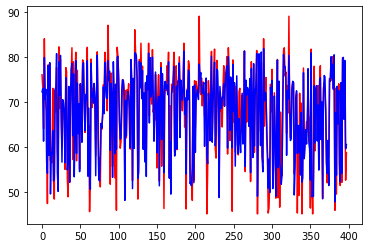

In [37]:
y_head = model.predict(x_test)
no =np.array(range(0,len(y_test)))
plt.plot(no,y_test,color="r")
plt.plot(no,y_head,color="blue")
plt.show()

In [38]:
# 对预期寿命与其余所有变量进行多项式回归
x = final.iloc[:,1:5].values
y = final.winsorized_Life_Expectancy.values.reshape(-1,1)

In [39]:
# 最高幂次为2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 1)
poly = PolynomialFeatures(degree=2)
poly_reg = LinearRegression()
model = poly_reg.fit(poly.fit_transform(x_train),y_train)

In [40]:
print("w0: ", poly_reg.intercept_)
print("w: ", poly_reg.coef_)

[67.91456028]
[[ 0.00000000e+00 -2.27207927e+01 -4.41137719e+00  3.87791991e-02
   1.39626980e+00  4.29401162e+01  6.72991174e+00 -3.31596818e-02
  -2.36035361e+00  1.16684076e-01  1.51591825e-02 -4.27175021e+00
  -1.63422387e-04 -1.51784133e-04  1.39626980e+00]]


In [41]:
model.score(poly.fit_transform(x_train), y_train)

0.9070189584631252

In [42]:
cross_val_score(model, poly.fit_transform(x_train),  y_train, cv= 10, scoring="r2").mean()

0.9041536766044203

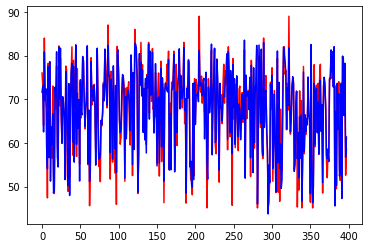

In [43]:
y_head = model.predict(poly.fit_transform(x_test))
no = np.array(range(0,len(y_test)))
plt.plot(no,y_test,color="r")
plt.plot(no,y_head,color="blue")
plt.show()

In [44]:
# 最高幂次为3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 1)
poly = PolynomialFeatures(degree=3)
poly_reg = LinearRegression()
model = poly_reg.fit(poly.fit_transform(x_train),y_train)

In [45]:
print("w0: ", poly_reg.intercept_)
print("w: ", poly_reg.coef_)

[-30.81561369]
[[ 7.50100188e-06  1.10313078e+02 -9.10076106e+00  2.54636744e-01
   4.26589706e+01  1.16539928e+02  3.04628023e+01 -1.43938634e-01
  -1.37899493e+02 -1.98446432e-02  3.65450548e-02 -4.83488521e+00
  -4.45678906e-04 -1.02400469e-01  4.26589686e+01 -1.10250594e+02
  -1.25438859e+01 -1.47982765e-01  1.46571104e+02 -4.00407683e+00
  -2.12890547e-02  5.64120363e+00  8.21943683e-05  2.53981306e-01
  -1.37899493e+02  4.56245642e-01 -3.58654309e-03  4.06745033e-01
   1.15921684e-06  8.42807893e-04 -4.83488521e+00  3.46496288e-07
  -1.72657563e-05 -1.02400366e-01  4.26589686e+01]]


In [46]:
model.score(poly.fit_transform(x_train), y_train)

0.9166884273479893

In [47]:
cross_val_score(model, poly.fit_transform(x_train),  y_train, cv= 10, scoring="r2").mean()

0.9121557434063347

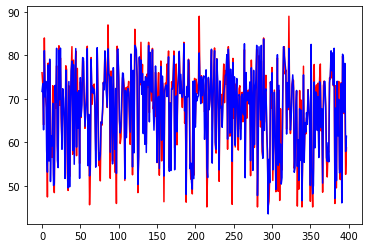

In [48]:
y_head = model.predict(poly.fit_transform(x_test))
no = np.array(range(0,len(y_test)))
plt.plot(no,y_test,color="r")
plt.plot(no,y_head,color="blue")
plt.show()

In [49]:
# 最高幂次为4
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 1)
poly = PolynomialFeatures(degree=4)
poly_reg = LinearRegression()
model = poly_reg.fit(poly.fit_transform(x_train),y_train)

In [50]:
print("w0: ", poly_reg.intercept_)
print("w: ", poly_reg.coef_)

[-5571.5012381]
[[ 7.26285193e+03 -6.74297293e+03  1.07314308e+01 -1.60308677e+00
  -3.59018544e+02  1.01071057e+04 -4.37993491e+02  6.18997329e+00
   1.80015058e+03  3.61401439e+00  1.38079910e-02 -2.57335602e+01
  -4.18781180e-03  3.95450364e-01 -3.59080323e+02 -6.37132811e+03
   4.66611634e+02 -5.71470996e+00 -3.38263553e+03 -4.49183048e+01
   4.06270961e-01  3.55775543e+02 -6.21795928e-03 -1.96145956e+00
   1.80015098e+03  1.84178749e+00 -4.77851862e-02  2.27819593e-02
   2.88372704e-02  2.11520077e-02 -2.57337092e+01  7.19118557e-06
  -7.89966750e-05  3.95433791e-01 -3.59080316e+02  1.37239314e+03
   2.18173459e+02  1.22144757e+00  2.84032714e+03  1.40602086e+01
  -8.07036774e-02 -8.82362270e+02  3.73444259e-03  2.69093840e+00
  -3.38263552e+03 -3.40335439e+00  5.61479393e-02  3.44583181e+01
  -3.68065145e-04 -4.08966039e-01  3.55775541e+02  3.91796675e-06
   7.65185307e-04 -1.96146100e+00  1.80015098e+03 -4.81764323e-01
   7.04789724e-03  1.48269651e+00  9.02269960e-05 -4.7765654

In [51]:
model.score(poly.fit_transform(x_train), y_train)

0.9197798056312422

In [52]:
cross_val_score(model, poly.fit_transform(x_train),  y_train, cv= 10, scoring="r2").mean()

0.9091247137787628

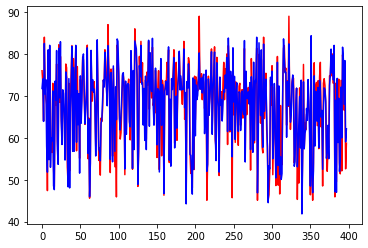

In [53]:
y_head = model.predict(poly.fit_transform(x_test))
no = np.array(range(0,len(y_test)))
plt.plot(no,y_test,color="r")
plt.plot(no,y_head,color="blue")
plt.show()